# Clustering Stock Market Data

In this project, I'll be discovering the groupings of stocks in the stock market dataset that I cleaned in a previous project. The task, discovering natural groups, is called clustering; and I'll be testing two different clustering algorithms, K-Means Clustering and Hierarchical Clustering.

## Loading the Data

I'll start by loading then printing the first few rows of the cleaned dataset.

In [1]:
import pandas as pd

df = pd.read_csv('clean_sp500.csv',index_col=0)

df.head()

,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Market Cap,Forward P/E,EPS next Y,Insider Trans,Shs Float,...,SMA20,SMA50,SMA200,Volume,Change,avg_daily_high_range,avg_daily_low_range,Earnings_BMO,Earnings_AMC,DJIA
A,24.42,2.68,0.0030,3.219200e+08,-0.0153,2.107000e+10,19.41,3.37,-0.0517,3.178900e+08,...,-0.0354,-0.0213,-0.0122,3119738.0,0.0346,0.0296,0.0314,0,1,0
AA,977.24,0.03,0.0010,1.956900e+08,0.0434,5.550000e+09,8.01,3.54,0.0000,1.859900e+08,...,0.0206,-0.1095,-0.3325,5652866.0,0.0800,0.0522,0.0511,0,1,0
AAL,6.94,4.62,0.0020,4.770100e+08,0.0000,1.528000e+10,5.63,5.69,0.0438,4.575900e+08,...,-0.0225,-0.0781,-0.1946,9344567.0,0.0659,0.0554,0.0530,1,0,0
AAP,34.34,4.63,0.0010,7.411000e+07,0.0266,1.177000e+10,19.50,8.14,0.0027,7.268000e+07,...,-0.0136,-0.0501,0.0871,1423037.0,-0.0248,0.0318,0.0320,1,0,0
AAPL,12.21,12.15,0.0007,4.870000e+09,-0.0505,7.222400e+11,10.13,14.64,-0.1491,4.740000e+09,...,-0.0838,-0.1921,-0.2319,57275863.0,0.0427,0.0267,0.0341,0,1,1


There are 74 columns in the datset.

The code below converts the column names to a list, then prints it out.

In [2]:
cols = df.columns.tolist()
print(cols)

['P/E', 'EPS (ttm)', 'Insider Own', 'Shs Outstand', 'Perf Week', 'Market Cap', 'Forward P/E', 'EPS next Y', 'Insider Trans', 'Shs Float', 'Perf Month', 'Income', 'PEG', 'EPS next Q', 'Inst Own', 'Short Float', 'Perf Quarter', 'Sales', 'P/S', 'EPS this Y', 'Inst Trans', 'Short Ratio', 'Perf Half Y', 'Book/sh', 'P/B', 'EPS next Y.1', 'ROA', 'Target Price', 'Perf Year', 'Cash/sh', 'P/C', 'EPS next 5Y', 'ROE', 'Perf YTD', 'Dividend', 'P/FCF', 'EPS past 5Y', 'ROI', '52W High', 'Beta', 'Dividend %', 'Quick Ratio', 'Sales past 5Y', 'Gross Margin', '52W Low', 'ATR', 'Employees', 'Current Ratio', 'Sales Q/Q', 'Oper. Margin', 'RSI (14)', 'Optionable', 'Debt/Eq', 'EPS Q/Q', 'Profit Margin', 'Rel Volume', 'Prev Close', 'Shortable', 'LT Debt/Eq', 'Earnings', 'Payout', 'Avg Volume', 'Price', 'Recom', 'SMA20', 'SMA50', 'SMA200', 'Volume', 'Change', 'avg_daily_high_range', 'avg_daily_low_range', 'Earnings_BMO', 'Earnings_AMC', 'DJIA']


## Dropping Columns

For this task, I'd like to use only numeric columns.

Time to remove columns that are categorical.

In [3]:
cols.remove('DJIA')
cols.remove('Earnings_BMO')
cols.remove('Earnings_AMC')
cols.remove('Optionable')
cols.remove('Shortable')

I'll also remove columns that are technical indicators based on the price, e.g. SMA2O.

In [4]:
cols.remove('ATR')
cols.remove('RSI (14)')
cols.remove('SMA20')
cols.remove('SMA50')
cols.remove('SMA200')

I'll also remove the columns that aren't measurements on an annual basis.

In [5]:
cols.remove('Perf Week')
cols.remove('Perf Month')
cols.remove('Perf Quarter')
cols.remove('Perf Half Y')
cols.remove('Perf YTD')
cols.remove('Avg Volume')
cols.remove('Change')
cols.remove('avg_daily_high_range')
cols.remove('avg_daily_low_range')
cols.remove('Rel Volume')
cols.remove('Volume')
cols.remove('Price')
cols.remove('Prev Close')
cols.remove('EPS next Q')
cols.remove('EPS Q/Q')

Lastly, I'll remove earnings, since there's already an Eearings Per Share column.

In [6]:
cols.remove('Earnings')

Here are the remaining columns.

In [7]:
print(cols)

['P/E', 'EPS (ttm)', 'Insider Own', 'Shs Outstand', 'Market Cap', 'Forward P/E', 'EPS next Y', 'Insider Trans', 'Shs Float', 'Income', 'PEG', 'Inst Own', 'Short Float', 'Sales', 'P/S', 'EPS this Y', 'Inst Trans', 'Short Ratio', 'Book/sh', 'P/B', 'EPS next Y.1', 'ROA', 'Target Price', 'Perf Year', 'Cash/sh', 'P/C', 'EPS next 5Y', 'ROE', 'Dividend', 'P/FCF', 'EPS past 5Y', 'ROI', '52W High', 'Beta', 'Dividend %', 'Quick Ratio', 'Sales past 5Y', 'Gross Margin', '52W Low', 'Employees', 'Current Ratio', 'Sales Q/Q', 'Oper. Margin', 'Debt/Eq', 'Profit Margin', 'LT Debt/Eq', 'Payout', 'Recom']


## Imputing and Transforming the Data

Several columns have missing values.

In [8]:
df[cols].isnull().sum()

P/E               38
EPS (ttm)          0
Insider Own        4
Shs Outstand       4
Market Cap         4
Forward P/E        6
EPS next Y         4
Insider Trans     18
Shs Float          1
Income             8
PEG               59
Inst Own          48
Short Float        1
Sales              0
P/S                4
EPS this Y         5
Inst Trans        10
Short Ratio        0
Book/sh            0
P/B               24
EPS next Y.1       4
ROA               16
Target Price       1
Perf Year          1
Cash/sh           35
P/C               35
EPS next 5Y       13
ROE               21
Dividend          94
P/FCF             72
EPS past 5Y       11
ROI                8
52W High           0
Beta              16
Dividend %        94
Quick Ratio      101
Sales past 5Y     12
Gross Margin      73
52W Low            0
Employees          0
Current Ratio     95
Sales Q/Q          0
Oper. Margin      15
Debt/Eq           31
Profit Margin     16
LT Debt/Eq        31
Payout            53
Recom        

A quick and easy way of filling-in missing values is mean imputation. The SkLearn library's Imputer, by default, uses the column mean to fill in missing values.

I'll proceed by using this imputer to fill-in the missing values.

In [9]:
from sklearn.preprocessing import Imputer
imp = Imputer()
X = imp.fit_transform(df[cols])

Some columns are ratios around 0 and 1, e.g. Beta, while other columns take on values in the hundreds or thousands e.g. Employees.

To put all columns on the same scale, I'll use SKLearn's StandScaler.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

The newly transformed dataset is printed below.

In [11]:
print(X)

[[ -5.72209668e-02  -3.32255087e-01  -2.36944411e-01 ...,  -2.39475469e-01
    1.19066649e-01  -1.27774489e+00]
 [  1.78864412e+00  -7.47329693e-01  -2.64688945e-01 ...,  -2.49076769e-01
    0.00000000e+00  -7.75809250e-01]
 [ -9.10843636e-02  -2.83891490e-02  -2.50816678e-01 ...,  -5.32979230e-17
   -5.09414425e-01  -7.75809250e-01]
 ..., 
 [ -1.88049966e-02  -3.83943623e-01  -2.64688945e-01 ...,  -1.65065392e-01
   -4.29967607e-01   2.28062026e-01]
 [ -8.28122409e-02  -1.56827329e-01  -1.67583077e-01 ...,  -3.01883920e-01
   -3.70382494e-01  -7.75809250e-01]
 [ -4.86195090e-02  -2.91530786e-01  -4.81290943e-17 ...,   3.96610673e-01
   -4.20036755e-01  -1.02677707e+00]]


## Testing Clustering

The first algorithm I'll test is the K Means algorithm. There are tons of tutorials out there, so I won't be going into any details on this one. I will briefly mention the [Silhouette Coefficient](https://en.wikipedia.org/wiki/Silhouette_(clustering)).

Since I don't know the what the groupings are, I need to have some method of deciding whether one particular clustering of the dataset is better than another. Fortunately, the silhouette coefficient is a clustering metric that more or less measures the quality of the clustering. 

Now, let's try the K-Means aglorithm. I'll test clusters of size 2 through 14, using the number 1 as the random seed.

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
scores = []
for k in clusters:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(X)
    score = silhouette_score(X,labels)
    scores.append(score)
print(scores)

[0.28613964567558942, 0.058263250277084754, 0.084970444328218542, 0.067354713820520523, 0.082647567914439155, 0.085480498906524149, 0.052720811279242566, 0.086926028635745251, 0.036877160455453327, 0.056637393376251906, 0.044295808291580162, 0.040185227201850547, 0.05250317910361451]


Out of the values tested, K-Means with 2 clusters had the highest silhouette coefficient of 28.6%. Using Berkeley's [document[(https://www.stat.berkeley.edu/~spector/s133/Clus.html) on clustering, this clustering "... is weak and could be artificial".

With Hierarchical Clustering, a.k.a. Agglomerative Clustering, we can see a clustering that has a 41.8% mean silhouette coefficient.

In [13]:
from sklearn.cluster import AgglomerativeClustering
scores = []
for k in clusters:
    ag = AgglomerativeClustering(n_clusters=k)
    labels = ag.fit_predict(X)
    score = silhouette_score(X,labels)
    scores.append(score)
print(scores)

[0.4151196516648849, 0.41823328412664657, 0.15361579825008226, 0.15885129659825639, 0.16518606174752906, 0.040087502838171946, 0.036650334796602756, 0.038148317924660793, 0.040280100770976206, 0.039929458062292589, 0.041618786186416706, 0.043549690049081845, 0.046696808647464144]


By default, SKLearn's [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) class uses Ward linkage as the linkage criterion.  

Let's see how this performs with the average distance as the linakge criterion.

In [14]:
print(X)

[[ -5.72209668e-02  -3.32255087e-01  -2.36944411e-01 ...,  -2.39475469e-01
    1.19066649e-01  -1.27774489e+00]
 [  1.78864412e+00  -7.47329693e-01  -2.64688945e-01 ...,  -2.49076769e-01
    0.00000000e+00  -7.75809250e-01]
 [ -9.10843636e-02  -2.83891490e-02  -2.50816678e-01 ...,  -5.32979230e-17
   -5.09414425e-01  -7.75809250e-01]
 ..., 
 [ -1.88049966e-02  -3.83943623e-01  -2.64688945e-01 ...,  -1.65065392e-01
   -4.29967607e-01   2.28062026e-01]
 [ -8.28122409e-02  -1.56827329e-01  -1.67583077e-01 ...,  -3.01883920e-01
   -3.70382494e-01  -7.75809250e-01]
 [ -4.86195090e-02  -2.91530786e-01  -4.81290943e-17 ...,   3.96610673e-01
   -4.20036755e-01  -1.02677707e+00]]


In [15]:
from sklearn.cluster import AgglomerativeClustering
scores = []
for k in clusters:
    ag = AgglomerativeClustering(n_clusters=k,linkage='average')
    labels = ag.fit_predict(X)
    score = silhouette_score(X,labels)
    scores.append(score)
print(scores)

[0.73268355859199552, 0.67166852470703164, 0.65460606958008316, 0.63613358576477941, 0.62577964809393705, 0.61639289121041529, 0.61185732207862864, 0.58559575356230853, 0.54027480942087103, 0.52733672652836738, 0.5136180330924579, 0.49716004744155823, 0.48318336280119178]


73.3% is a huge improvement. According to the Berkely document "a strong structure has been found".

Still, I could try to use the maximum distance as the linakge criterion.

In [16]:
from sklearn.cluster import AgglomerativeClustering
scores = []
for k in clusters:
    ag = AgglomerativeClustering(n_clusters=k,linkage='complete')
    labels = ag.fit_predict(X)
    score = silhouette_score(X,labels)
    scores.append(score)
print(scores)

[0.73268355859199552, 0.67166852470703164, 0.64452529409352832, 0.51123584737459593, 0.51241300835363124, 0.51345320800080596, 0.51408841309809361, 0.51344234553632606, 0.37621543322357126, 0.37880114572405005, 0.36968533994931718, 0.37123706480478058, 0.37283731382161062]


Hierarchical Clustering with either 'complete' or 'average' linkage and 2 clusters provides the best clustering, with a mean silhouette coefficient of 73.3%.

## Visualing the Clustering

You can visualize the clustering from Hierarchical Clustering by using a tree-like diagram called a [dendrogram](https://en.wikipedia.org/wiki/Dendrogram). 

The dendrogram puts the distance between clusters on the y-axis, and the row labels on the x-axis. With a dendrogram you see which observations are closer to one another.

The code below plots a dendrogram for the Hierarchical Clustering with maximum distance as the linkage criterion.

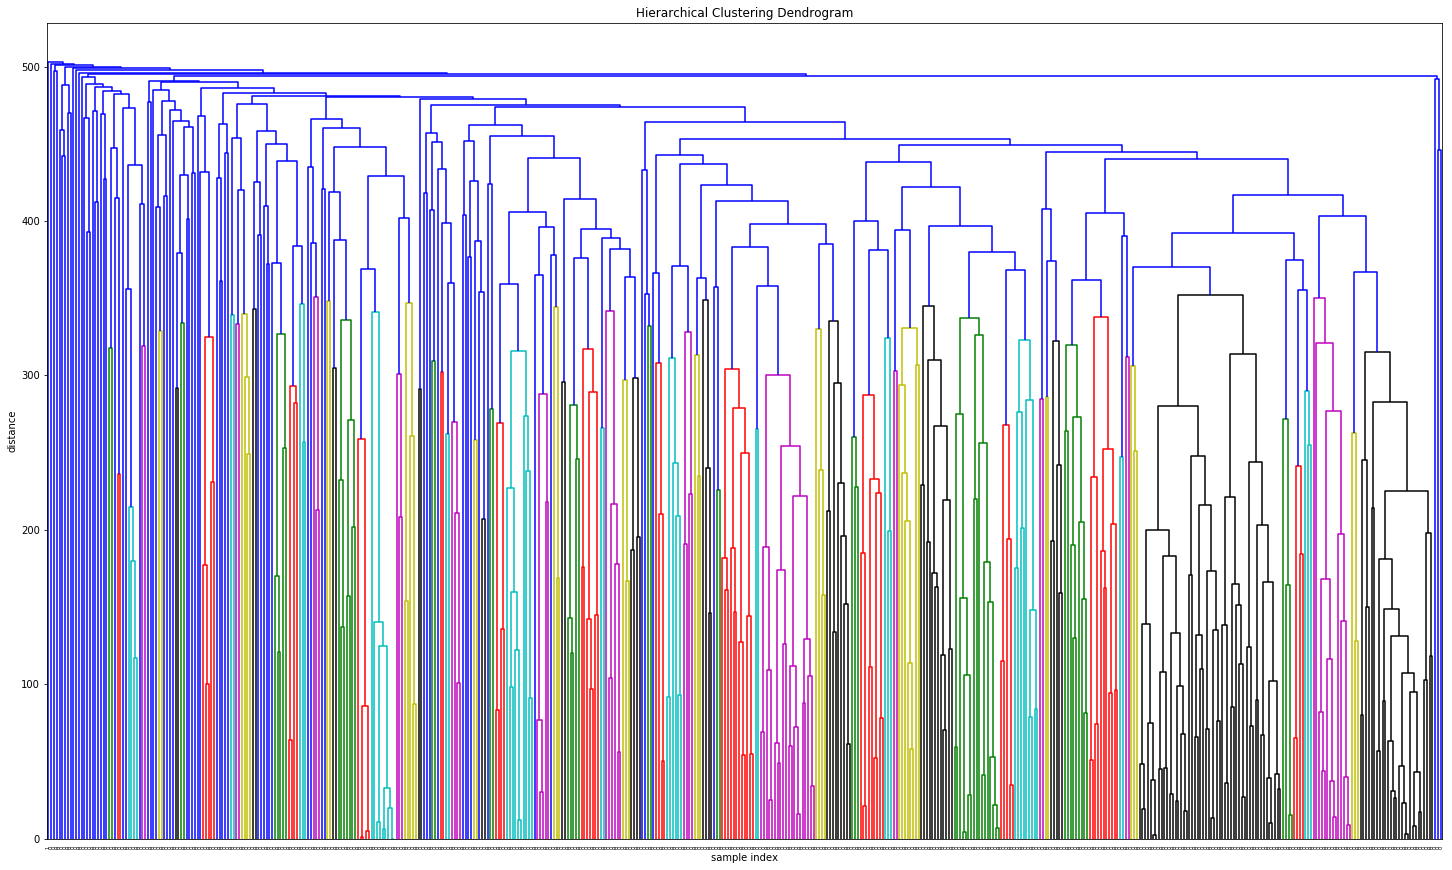

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

cl = AgglomerativeClustering(n_clusters=2,linkage='complete')
cl.fit(X)

children = cl.children_
distance = np.arange(children.shape[0])
no_of_observations = np.arange(2, children.shape[0]+2)
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

plt.figure(figsize=(25, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, labels=cl.labels_)
plt.show()

## Analyzing the Clusters

The dendrogram in the last section looked pretty cool, but it wasn't clear which stocks were in each cluster.

Interestingly, all except 1 stock is in the first cluster.

In [18]:
df['Cluster'] = cl.fit_predict(X)
df.loc[df['Cluster'] == 0,:].shape[0]

504

Only 1 stock, Masco Corporation, was in the second cluster.

In [19]:
df.loc[df['Cluster'] == 1,cols]

,P/E,EPS (ttm),Insider Own,Shs Outstand,Market Cap,Forward P/E,EPS next Y,Insider Trans,Shs Float,Income,...,52W Low,Employees,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,Profit Margin,LT Debt/Eq,Payout,Recom
MAS,15.72,1.96,0.004,316150000.0,9.720000e+09,11.21,2.74,-0.2453,302470000.0,606000000.0,...,0.1373,26000,1.7,0.08,0.135,82.58,0.076,82.53,0.207,2.0


## Conclusion

While it wasn't my intention to identify an outlier in the dataset, the clustering algorithm I chose did find an unusual observation.

This shouldn't be too suprising since Anomaly Detection is an [application of clustering](https://en.wikipedia.org/wiki/Cluster_analysis#Computer_science).

I think I'll use another dataset in my next project.

As always, thanks for reading.